<a href="https://colab.research.google.com/github/GhazalehKeyvani/Data-Science-Exercises/blob/main/Frequency_TS1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**تجزیه و تحلیل نتایج
سیگنال اصلی:** ترکیبی از فرکانس‌های ۵، ۱۰ و ۲۰ هرتز.

نویز: باعث اضافه شدن فرکانس‌های تصادفی در طیف شد.

بازسازی: با اعمال آستانه (threshold=0.3)، فرکانس‌های اصلی شناسایی و نویز حذف شدند. سیگنال بازساخته تقریباً با سیگنال اصلی منطبق است.

نکات مهم
انتخاب آستانه: مقدار آستانه به سطح نویز و دامنه سیگنال اصلی بستگی دارد.

فرکانس نمونه‌برداری: باید حداقل دو برابر بالاترین فرکانس موجود در سیگنال باشد (طبق قضیه نایکوئیست).

کاربردها: این روش در پردازش سیگنال، شناسایی فرکانس‌های غالب در داده‌های واقعی (مانند صوت یا لرزش) استفاده می‌شود.

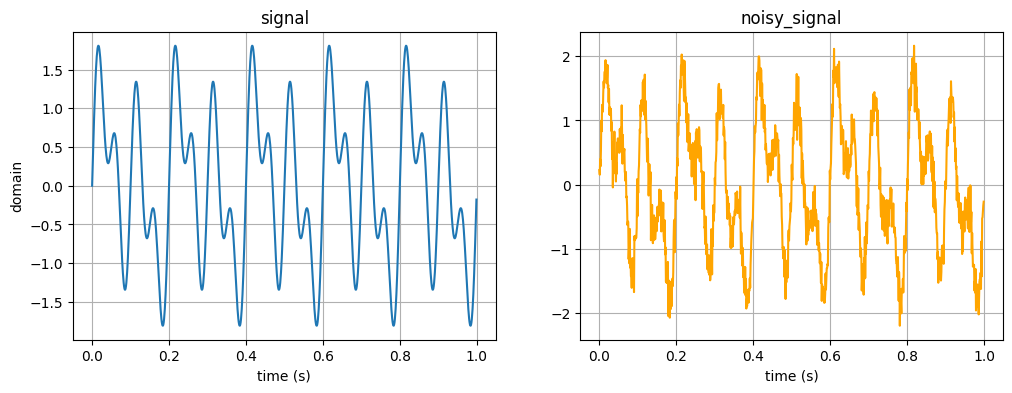

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# پارامترهای سیگنال
fs = 1000  # فرکانس نمونه‌برداری (Hz)
T = 1.0    # مدت زمان سیگنال (ثانیه)
t = np.linspace(0, T, int(fs * T), endpoint=False)  # محور زمان

# ایجاد سیگنال اصلی (ترکیب سه فرکانس)
frequencies = [5, 10, 20]  # فرکانس‌ها (Hz)
signal = (
    0.5 * np.sin(2 * np.pi * frequencies[0] * t) +
    1.0 * np.sin(2 * np.pi * frequencies[1] * t) +
    0.8 * np.sin(2 * np.pi * frequencies[2] * t)
)

# افزودن نویز گوسی
noise = 0.2 * np.random.normal(size=len(t))
noisy_signal = signal + noise

# رسم سیگنال اصلی و نویزی
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(t, signal, label='signal')
plt.xlabel('time (s)')
plt.ylabel('domain')
plt.title('signal')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(t, noisy_signal, label='noisy_signal', color='orange')
plt.xlabel('time (s)')
plt.title('noisy_signal')
plt.grid(True)
plt.show()

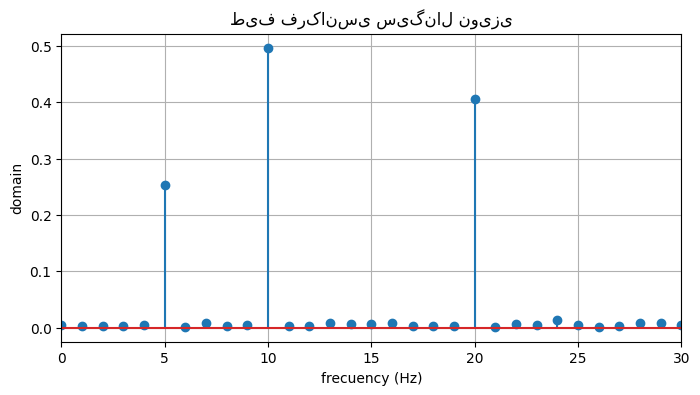

In [7]:
# محاسبه FFT
n = len(noisy_signal)
fft_values = np.fft.fft(noisy_signal)
fft_freq = np.fft.fftfreq(n, d=1/fs)  # فرکانس‌ها

# محاسبه دامنه و فاز
amplitude = np.abs(fft_values) / n  # نرمال‌سازی
amplitude = amplitude[:n//2]        # استفاده از نیمه مثبت
fft_freq = fft_freq[:n//2]

# رسم طیف فرکانسی
plt.figure(figsize=(8, 4))
plt.stem(fft_freq, amplitude)
plt.xlabel('frecuency (Hz)')
plt.ylabel('domain')
plt.title('طیف فرکانسی سیگنال نویزی')
plt.xlim(0, 30)  # محدوده فرکانس مورد بررسی
plt.grid(True)
plt.show()

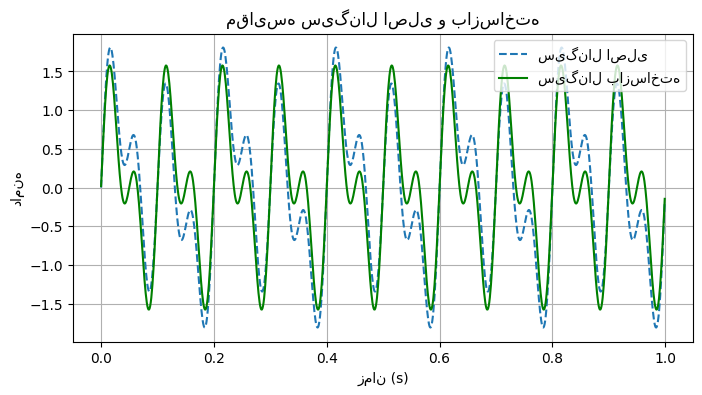

In [8]:
# فیلتر کردن فرکانس‌های غیر اصلی (حذف نویز)
threshold = 0.3  # آستانه دامنه
filtered_fft = fft_values.copy()
filtered_fft[np.abs(fft_values)/n < threshold] = 0  # حذف فرکانس‌های با دامنه کم

# محاسبه تبدیل معکوس فوریه (IFFT)
reconstructed_signal = np.fft.ifft(filtered_fft).real  # تبدیل به مقدار حقیقی

# رسم سیگنال بازساخته
plt.figure(figsize=(8, 4))
plt.plot(t, signal, label='سیگنال اصلی', linestyle='--')
plt.plot(t, reconstructed_signal, label='سیگنال بازساخته', color='green')
plt.xlabel('زمان (s)')
plt.ylabel('دامنه')
plt.title('مقایسه سیگنال اصلی و بازساخته')
plt.legend()
plt.grid(True)
plt.show()


برای بهبود نتایج:
1. افزایش فرکانس نمونه‌برداری (fs) برای دقت بیشتر.
2. استفاده از پنجره‌گذاری (Hamming, Hanning) برای کاهش اثر لبه‌ها در FFT.
3. تنظیم آستانه به صورت دینامیک بر اساس میانگین دامنه‌ها.


من باید یک پیادهسازی از سری فوریه در پایتون انجام دهم.  سری فوریه برای تجزیه یک تابع تناوبی به مجموعهای از توابع سینوسی و کسینوسی با فرکانسهای مختلف استفاده میشه. پس باید یک تابع تناوبی رو انتخاب کنم یا بسازم، بعدش ضرایب فوریه رو محاسبه کنم و دوباره تابع اصلی رو از اون ضرایب بازسازی کنم.

اول، نیاز دارم که دادههای مناسب رو ایجاد کنم. میتونم یک سیگنال نمونه مثل ترکیبی از چند سینوسی با فرکانسهای مختلف بسازم و بعد بهش نویز اضافه کنم تا شبیه دادههای واقعی بشه. مثلاً یک سیگنال اصلی مثل sum of sines با فرکانسهای ۵ هرتز، ۱۰ هرتز و ۲۰ هرتز بسازم. بعد به این سیگنال نویز گوسی اضافه کنم.

سپس باید ضرایب فوریه رو محاسبه کنم. برای این کار میتونم از تبدیل فوریه گسسته (DFT) استفاده کنم که در پایتون با کتابخانه numpy میشه به راحتی انجامش داد. تابع np.fft.fft برای محاسبه تبدیل فوریه سریع (FFT) استفاده میشه. بعد از محاسبه FFT، باید فرکانسها و دامنههای مربوط به هر فرکانس رو استخراج کنم.

بعد از به دست آوردن ضرایب، میخوام سیگنال اصلی رو از این ضرایب بازسازی کنم و با سیگنال اصلی مقایسهش کنم. همچنین باید نمودارهای سیگنال اصلی، سیگنال نویزی، طیف فرکانسی و سیگنال بازسازیشده رو رسم کنم تا نتایج رو بهتر ببینم.

ممکنه در طول کار با مشکلاتی مثل انتخاب نادرست فرکانسها، نویز زیاد، یا خطا در محاسبه ضرایب فوریه مواجه بشم. باید مطمئن بشم که دادهها به درستی نرمال شدهاند و پارامترهای FFT مثل تعداد نقاط و فرکانس نمونهبرداری درست تنظیم شدهاند.

همچنین باید بررسی کنم که آیا بازسازی سیگنال از ضرایب فوریه به اندازه کافی دقیق هست یا نه. اگر اختلاف زیادی بین سیگنال اصلی و بازسازیشده وجود داشته باشه، ممکنه نیاز باشه پارامترها رو تنظیم کنم یا از روشهای دیگری برای کاهش نویز استفاده کنم.